### Capstone project- Customer Churn

### Business Objective

An E Commerce company or DTH (you can choose either of these two domains) provider is 
facing a lot of competition in the current market and it has become a challenge to retain the 
existing customers in the current situation. Hence, the company wants to develop a model 
through which they can do churn prediction of the accounts and provide segmented offers to the 
potential churners. In this company, account churn is a major thing because 1 account can have 
multiple customers. hence by losing one account the company might be losing more than one 
customer.
You have been assigned to develop a churn prediction model for this company and provide 
business recommendations on the campaign.
Your campaign suggestion should be unique and be very clear on the campaign offer because 
your recommendation will go through the revenue assurance team. If they find that you are 
giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going 
to approve your recommendation. 
Hence be very careful while providing campaign recommendation.

### Importing libraries and overview of the dataset

In [1]:
# importing libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy.stats import f
import os
%matplotlib inline
# Numerical libraries
import numpy as np   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
%matplotlib inline 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

### Checking the dictionary path & correcting if need be


In [3]:
os.getcwd()

'C:\\Users\\admin\\Downloads'

### Loading the dataset

In [4]:
churn  = pd.read_excel('Customer Churn Data.xlsx', sheet_name = 'Data for DSBA')

### Understanding the data

In [5]:
### # Returns the first and last 5 rows
churn

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer


In [6]:
# checking info of data
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [7]:
# checking shape of dataset
print("The shape of dataset is :{}".format(churn.shape))

The shape of dataset is :(11260, 19)


In [8]:
# describing data
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [9]:
# describing data including object variable as well
churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory data analysis

In [10]:
# checking for null values
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [11]:
# checking for duplicate values
print("Number of duplicate rows:",churn.duplicated().sum())

Number of duplicate rows: 0


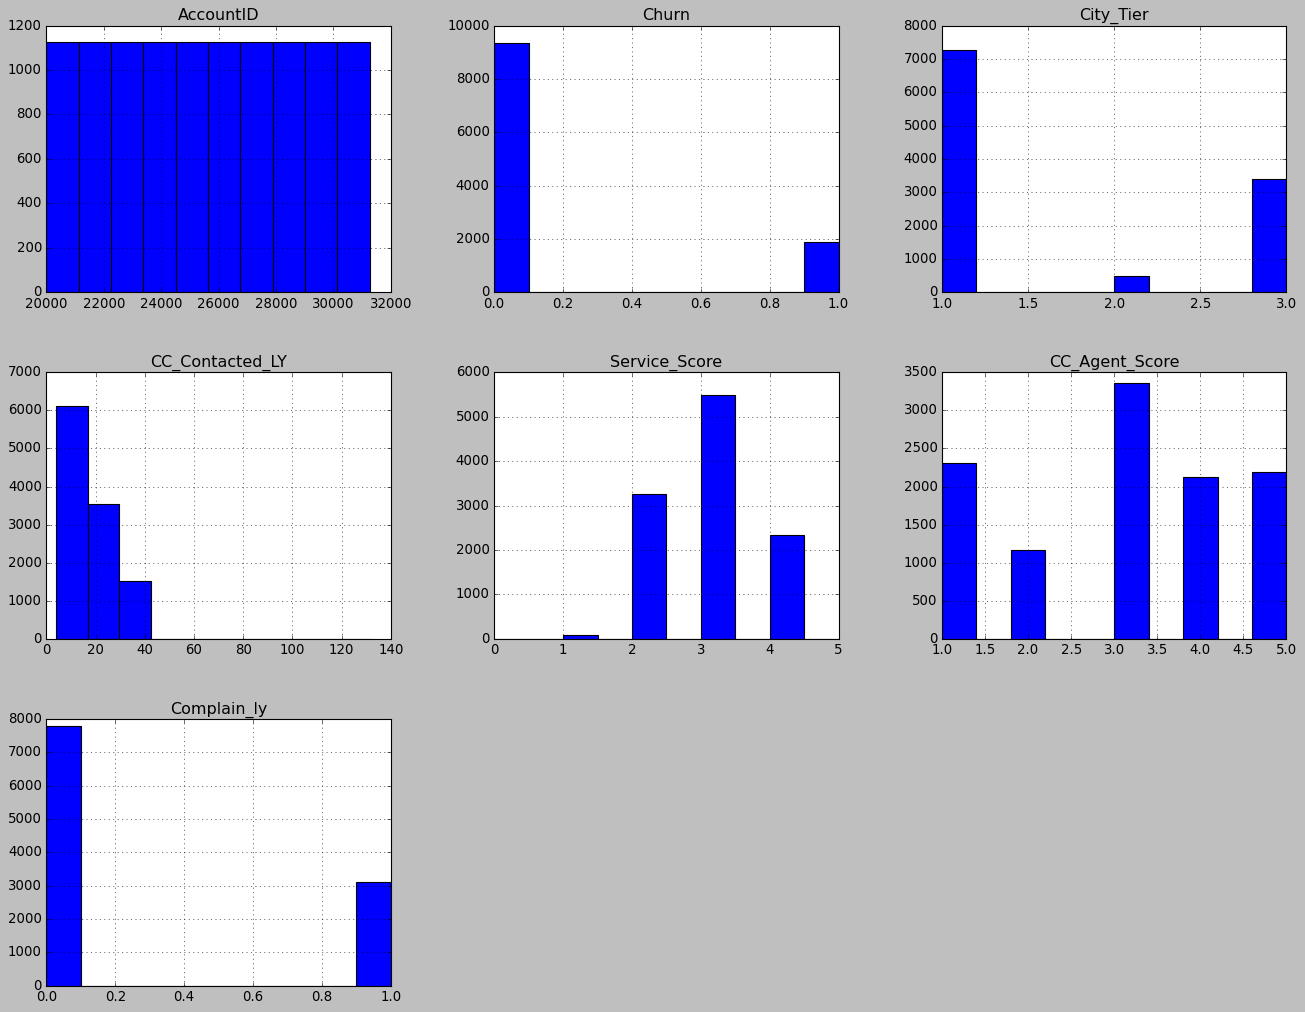

In [12]:
#checking for skewness
churn.hist(figsize=(20,15));

In [13]:
# kest check kurtosis and skewness of data
print("kurtosis and skewness of dataste is as below")
pd.DataFrame(data = [churn.kurtosis(), churn.skew()], index=['Kurtosis','Skewness']).T.round(2)

kurtosis and skewness of dataste is as below


,Kurtosis,Skewness
AccountID,-1.20,0.00
Churn,1.14,1.77
City_Tier,-1.40,0.74
CC_Contacted_LY,8.23,1.42
Service_Score,-0.67,0.00
CC_Agent_Score,-1.12,-0.14
Complain_ly,-1.10,0.95


<Axes: >

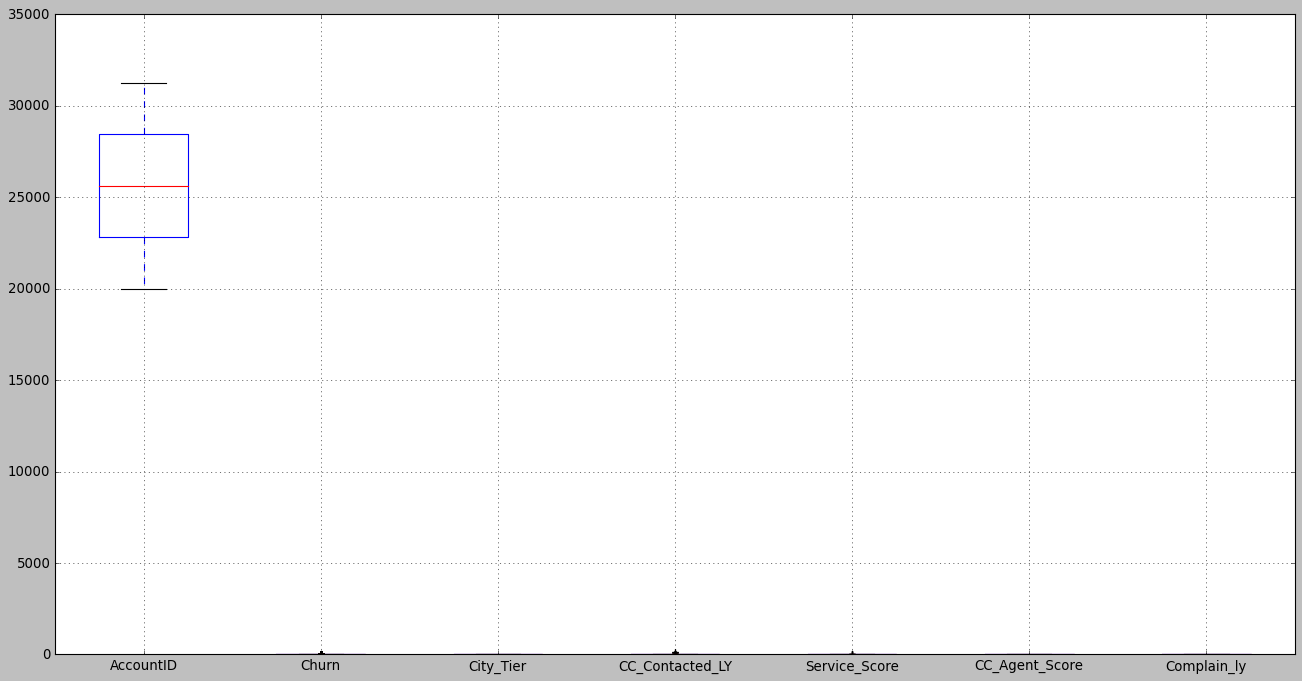

In [14]:
# to perform uni-variate analysis on continous variable, lets plot the box plots and distribution plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#checking for outliers using box plot
churn.boxplot(figsize=(20,10))

In [15]:
# lets check the percentage of outlier in each column
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))).sum()/churn.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

,outlier %
AccountID,0.00
Account_user_count,0.00
CC_Agent_Score,0.00
CC_Contacted_LY,0.37
Churn,16.84
City_Tier,0.00
Complain_ly,0.00
Day_Since_CC_connect,0.00
Gender,0.00
Login_device,0.00


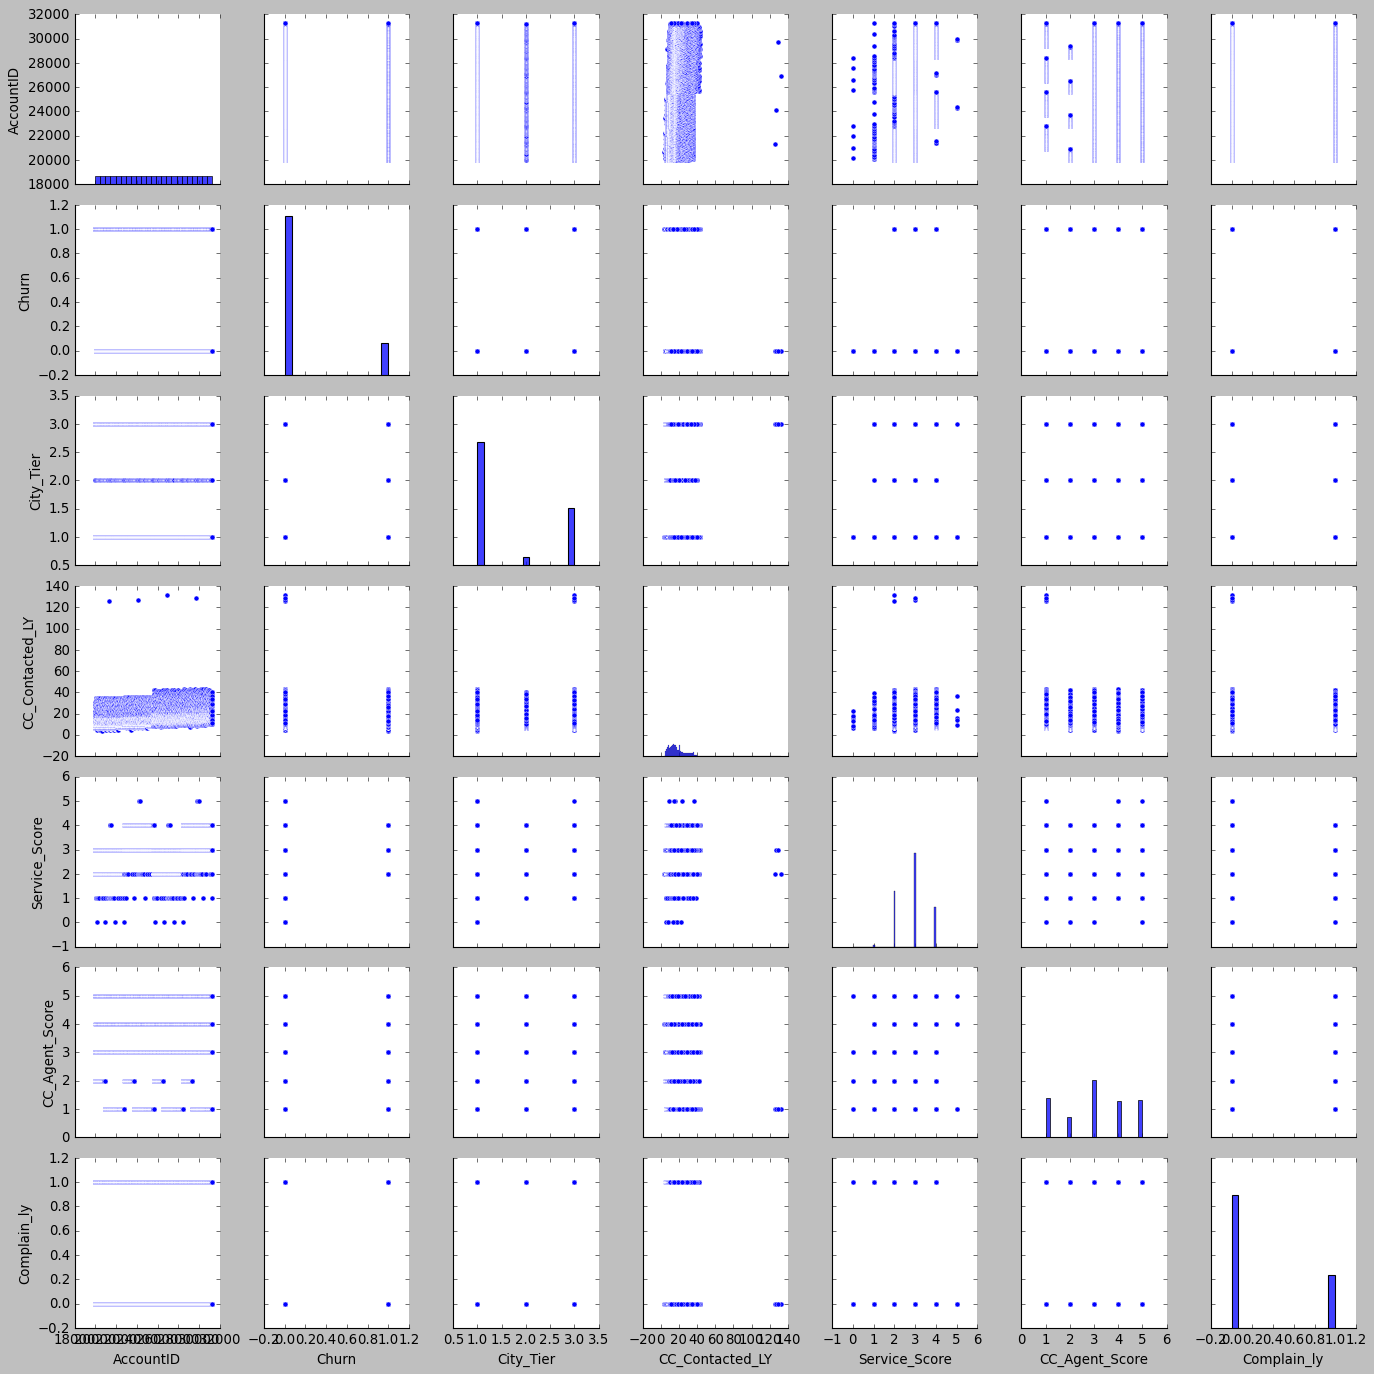

In [16]:
#the pair plot:-
sns.pairplot(data = churn)
plt.show()

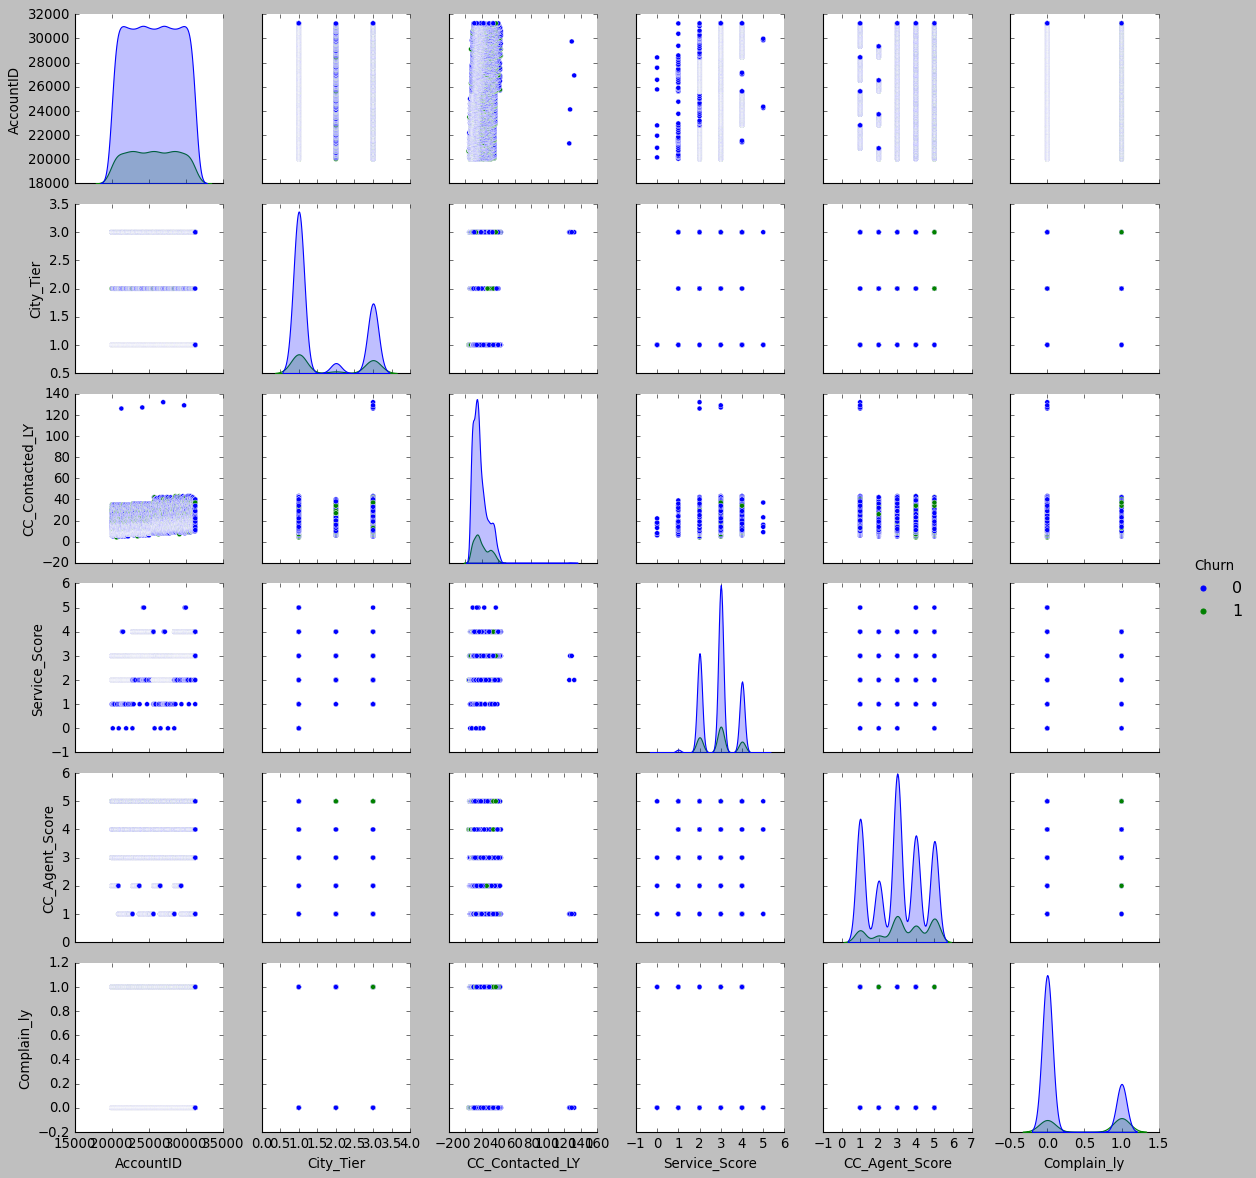

In [17]:
# plotting sns plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# pair plot to check on data distribution and co-linearity
sns.pairplot(churn, hue = 'Churn', diag_kind='kde')  
plt.show()

In [18]:
#checking if the data is balanced or not
churn.groupby(["Churn"]).count()

,AccountID,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
Churn,,,,,,,,,,,,,,,,,,
0,9364,9285,9269,9280,9277,9278,9282,9271,9285,9270,9184,9278,9065,9364,9364,9071,8978,9185
1,1896,1873,1879,1878,1874,1874,1880,1877,1878,1874,1864,1880,1838,1896,1896,1832,1811,1854


### Univariate Analysis

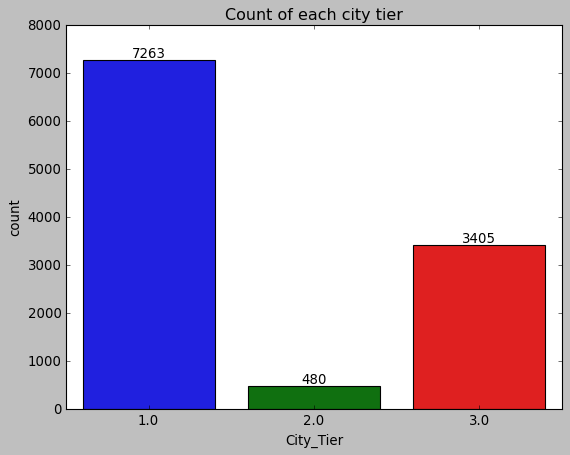

In [19]:
ct=sns.countplot(data=churn,x='City_Tier')
plt.bar_label(ct.containers[0])
plt.title('Count of each city tier');

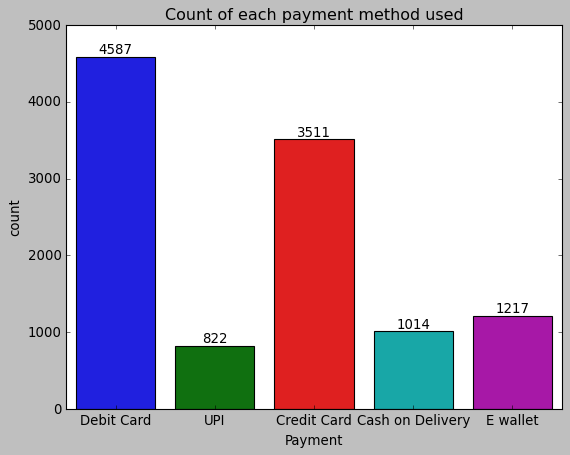

In [20]:
py=sns.countplot(data=churn,x='Payment')
plt.bar_label(py.containers[0])
plt.title('Count of each payment method used');

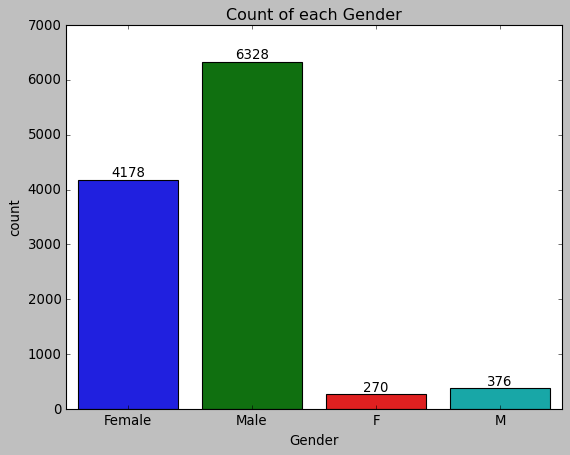

In [21]:
gd=sns.countplot(data=churn,x='Gender')
plt.bar_label(gd.containers[0])
plt.title('Count of each Gender');

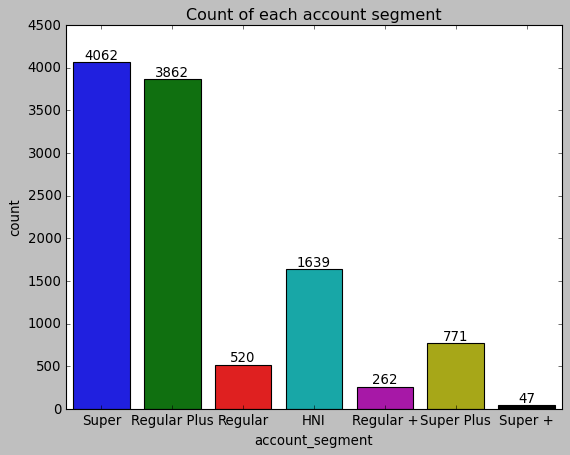

In [22]:
ass=sns.countplot(data=churn,x='account_segment')
plt.bar_label(ass.containers[0])
plt.title('Count of each account segment');

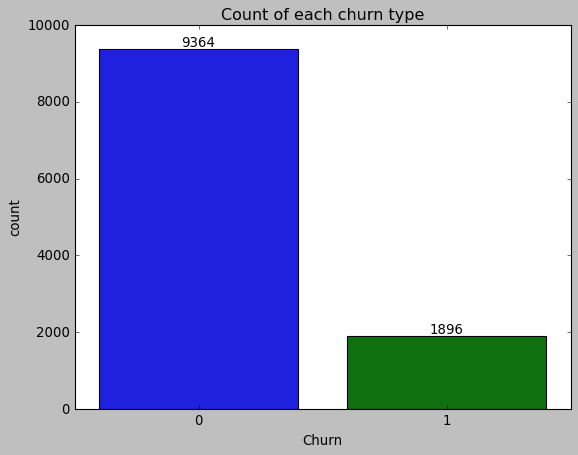

In [23]:
ch=sns.countplot(data=churn,x='Churn')
plt.bar_label(ch.containers[0])
plt.title('Count of each churn type');

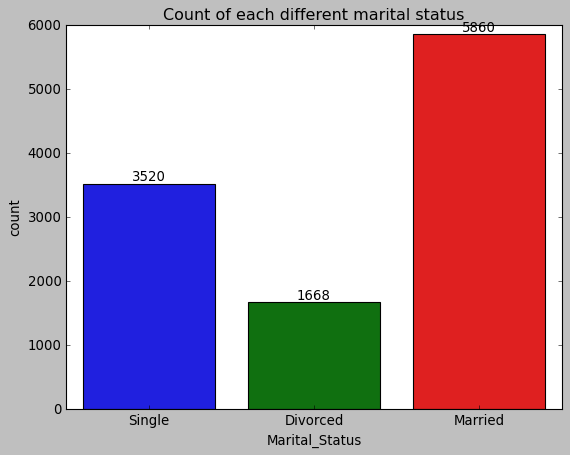

In [24]:
ms=sns.countplot(data=churn,x='Marital_Status')
plt.bar_label(ms.containers[0])
plt.title('Count of each different marital status');

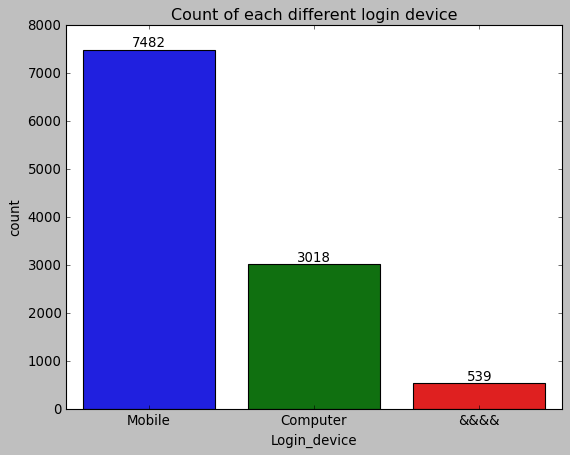

In [25]:
ld=sns.countplot(data=churn,x='Login_device')
plt.bar_label(ld.containers[0])
plt.title('Count of each different login device');

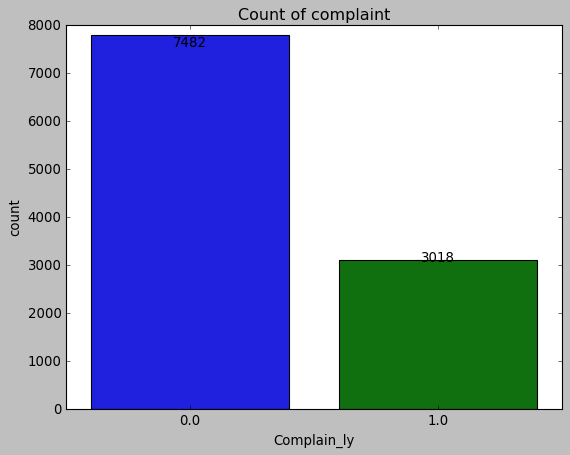

In [26]:
com=sns.countplot(data=churn,x='Complain_ly')
plt.bar_label(ld.containers[0])
plt.title('Count of complaint');

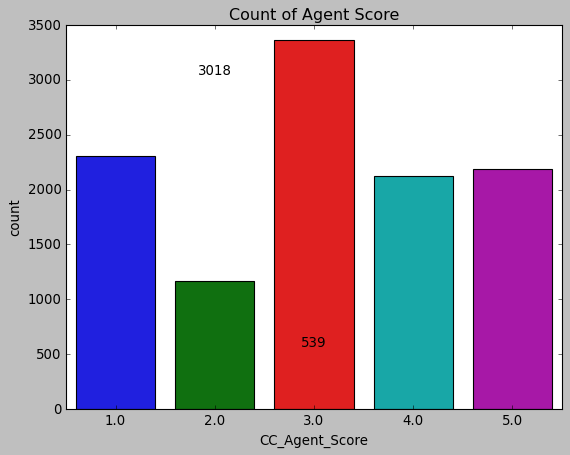

In [27]:
ags=sns.countplot(data=churn,x='CC_Agent_Score')
plt.bar_label(ld.containers[0])
plt.title('Count of Agent Score');

### Bi-Variate and multi variate analysis

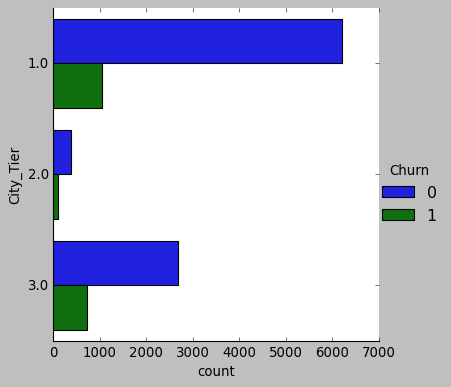

In [28]:
sns.catplot(y="City_Tier", hue="Churn", kind="count", data=churn)

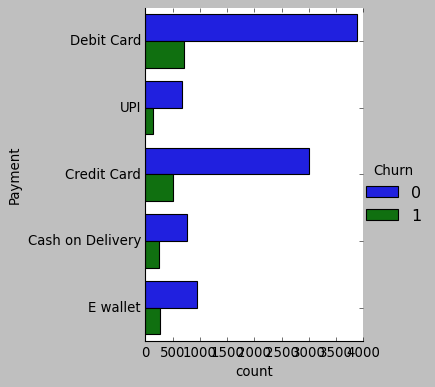

In [29]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=churn)

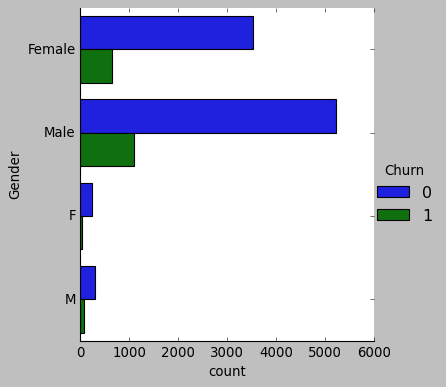

In [30]:
sns.catplot(y="Gender", hue="Churn", kind="count", data=churn)

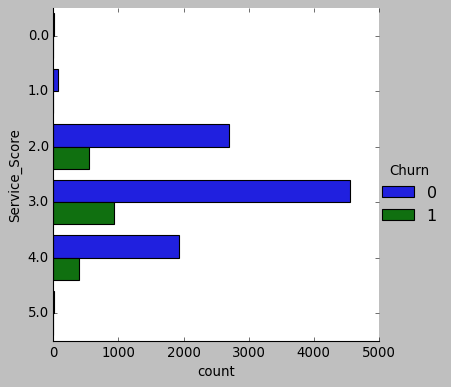

In [31]:
sns.catplot(y="Service_Score", hue="Churn", kind="count", data=churn)

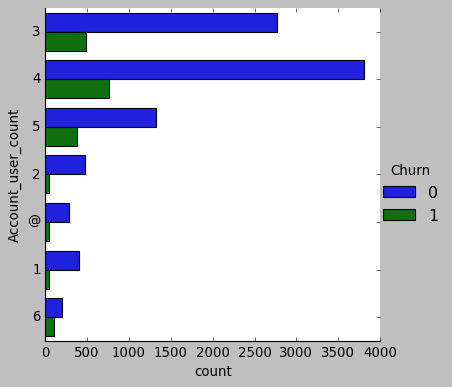

In [32]:
sns.catplot(y="Account_user_count", hue="Churn", kind="count", data=churn)

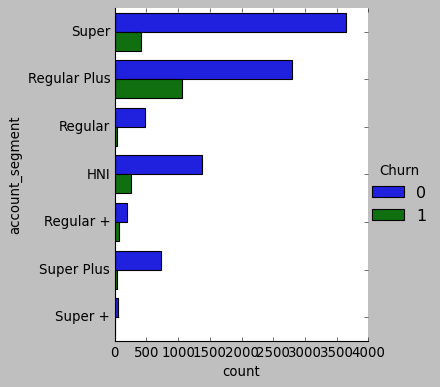

In [33]:
sns.catplot(y="account_segment", hue="Churn", kind="count", data=churn)

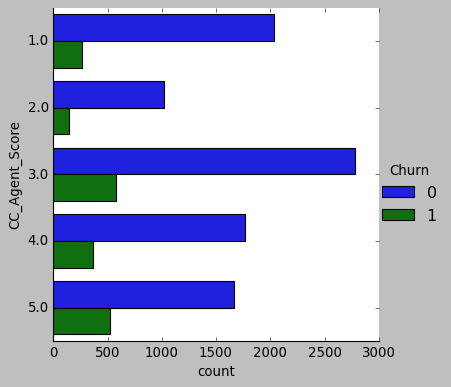

In [34]:
sns.catplot(y="CC_Agent_Score", hue="Churn", kind="count", data=churn)

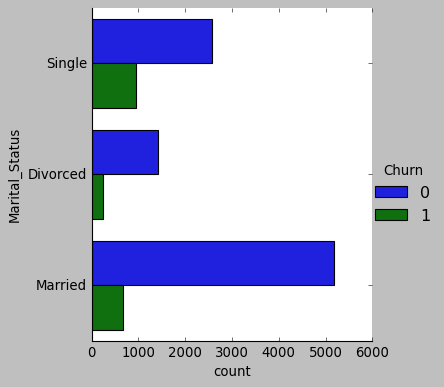

In [35]:
sns.catplot(y="Marital_Status", hue="Churn", kind="count", data=churn)

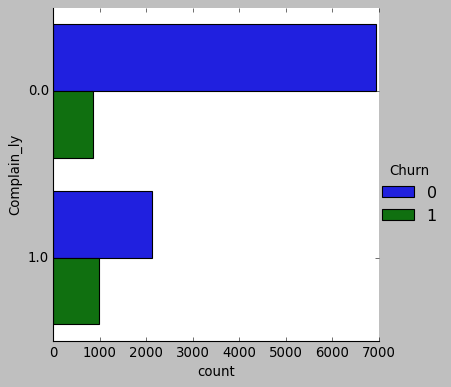

In [36]:
sns.catplot(y="Complain_ly", hue="Churn", kind="count", data=churn)

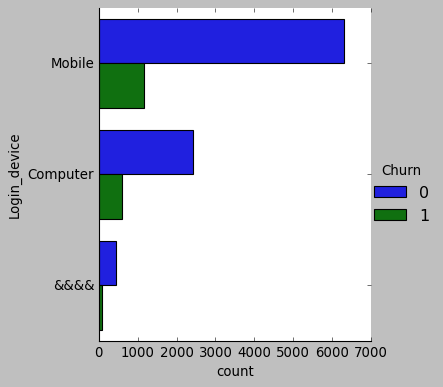

In [37]:
sns.catplot(y="Login_device", hue="Churn", kind="count", data=churn)

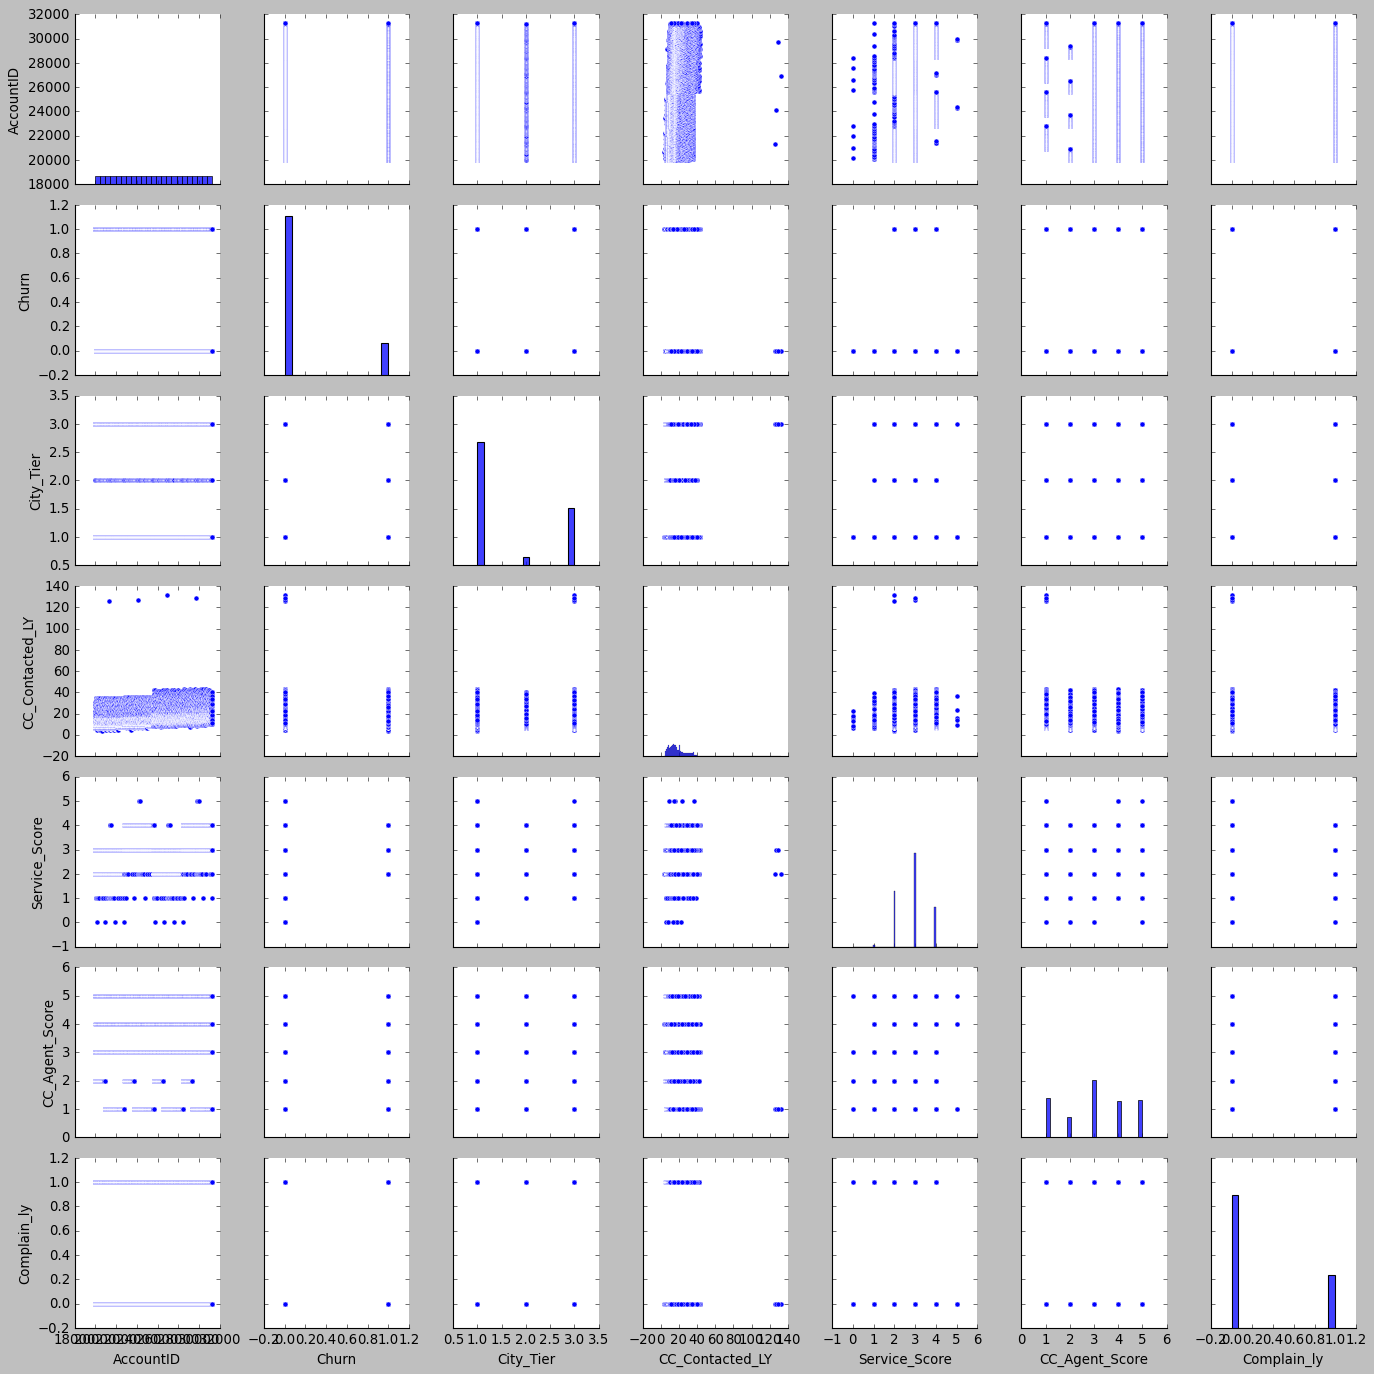

In [38]:
#the pair plot:-
sns.pairplot(data = churn)
plt.show()

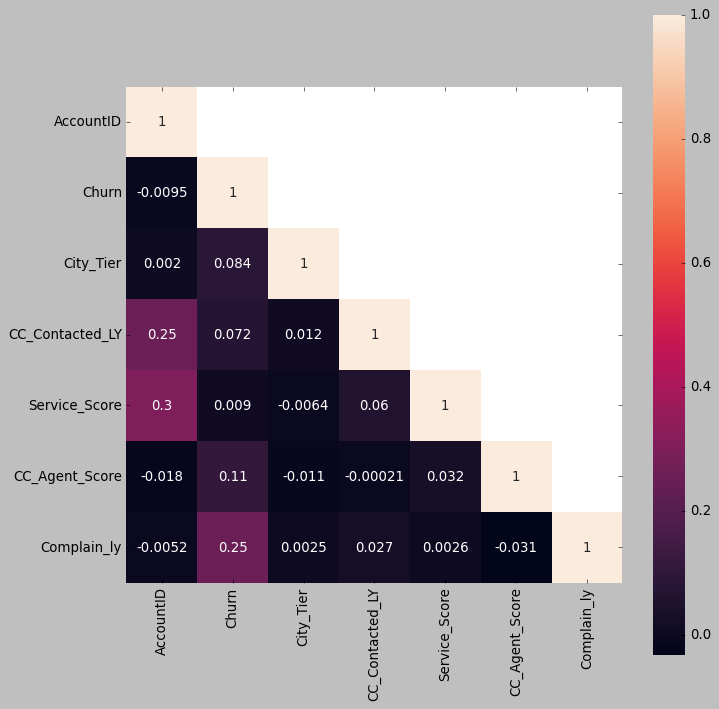

In [39]:
# plotting heatmap of correlation
cor = churn.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, vmax=1, square=True, annot=True)
plt.show()

In [40]:
# checking data distribution of categorical object data types
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

In [41]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [42]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## Treating Bad data

## Treating the variable "tenure"

### Let's imput the null values

In [43]:
churn["Tenure"].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [44]:
churn['Tenure'] = churn['Tenure'].replace('#',np.NaN)

In [45]:
churn['Tenure'] = churn['Tenure'].astype('Int64')

In [46]:
churn["Tenure"].unique()

<IntegerArray>
[   4,    0,    2,   13,   11, <NA>,    9,   99,   19,   20,   14,    8,   26,
   18,    5,   30,    7,    1,   23,    3,   29,    6,   28,   24,   25,   16,
   10,   15,   22,   27,   12,   21,   17,   50,   60,   31,   51,   61]
Length: 38, dtype: Int64

In [47]:
churn['Tenure'] = churn['Tenure'].fillna(churn['Tenure'].median())

In [48]:
churn["Tenure"].unique()

<IntegerArray>
[ 4,  0,  2, 13, 11,  9, 99, 19, 20, 14,  8, 26, 18,  5, 30,  7,  1, 23,  3,
 29,  6, 28, 24, 25, 16, 10, 15, 22, 27, 12, 21, 17, 50, 60, 31, 51, 61]
Length: 37, dtype: Int64

In [49]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

### Treating the variable "City_Tier"

In [50]:
churn["City_Tier"].unique()

array([ 3.,  1., nan,  2.])

In [51]:
churn['City_Tier'] = churn['City_Tier'].fillna(churn['City_Tier'].mode()[0])

In [52]:
churn["City_Tier"].unique()

array([3., 1., 2.])

In [53]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [54]:
churn['City_Tier'] = churn['City_Tier'].astype('Int64')

In [55]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Treating the variable "CC_Contacted_LY"

In [56]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [57]:
churn['CC_Contacted_LY'] = churn['CC_Contacted_LY'].fillna(churn['CC_Contacted_LY'].median())

In [58]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  34.,   5.,   4., 126.,   7.,
        36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43., 129.])

In [59]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [60]:
churn['CC_Contacted_LY'] = churn['CC_Contacted_LY'].astype('Int64')

In [61]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Treating the variable "Payment"

In [66]:
churn["Payment"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [63]:
churn['Payment'] = churn['Payment'].fillna(churn['Payment'].mode()[0])

In [69]:
churn['Payment'] = churn['Payment'].replace('Debit Card','1')
churn['Payment'] = churn['Payment'].replace('UPI','2')
churn['Payment'] = churn['Payment'].replace('Credit Card','3')
churn['Payment'] = churn['Payment'].replace('Cash on Delivery','4')
churn['Payment'] = churn['Payment'].replace('E wallet','5')

In [70]:
churn["Payment"].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [71]:
churn['Payment'] = churn['Payment'].astype('float64')

In [72]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [73]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

### Treating the variable "Gender"

In [74]:
churn["Gender"].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [75]:
churn['Gender'] = churn['Gender'].replace('Female','1')
churn['Gender'] = churn['Gender'].replace('F','1')
churn['Gender'] = churn['Gender'].replace('Male','2')
churn['Gender'] = churn['Gender'].replace('M','2')

In [76]:
churn["Gender"].unique()

array(['1', '2', nan], dtype=object)

In [77]:
churn['Gender'] = churn['Gender'].fillna(churn['Gender'].mode()[0])

In [78]:
churn["Gender"].unique()

array(['1', '2'], dtype=object)

In [79]:
churn['Gender'] = churn['Gender'].astype('float64')

In [80]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

### Treating the variable "Service_Score"

In [81]:
churn["Service_Score"].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [82]:
churn['Service_Score'] = churn['Service_Score'].fillna(churn['Service_Score'].mode()[0])

In [83]:
churn["Service_Score"].unique()

array([3., 2., 1., 0., 4., 5.])

In [84]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [85]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Treating the variable "Account_user_count"

In [86]:
churn["Account_user_count"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [87]:
churn['Account_user_count'] = churn['Account_user_count'].replace('@',np.NaN)

In [88]:
churn["Account_user_count"].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [89]:
churn['Account_user_count'] = churn['Account_user_count'].fillna(churn['Account_user_count'].median())

In [90]:
churn["Account_user_count"].unique()

array([3., 4., 5., 2., 1., 6.])

In [91]:
churn['Account_user_count'] = churn['Account_user_count'].astype('float64')

In [92]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [93]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Tretaing the variable "account_segment"¶

In [94]:
churn["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [95]:
churn['account_segment'] = churn['account_segment'].replace('Super','1')
churn['account_segment'] = churn['account_segment'].replace('Regular Plus','2')
churn['account_segment'] = churn['account_segment'].replace('Regular +','2')
churn['account_segment'] = churn['account_segment'].replace('Regular','3')
churn['account_segment'] = churn['account_segment'].replace('HNI','4')
churn['account_segment'] = churn['account_segment'].replace('Super Plus','5')
churn['account_segment'] = churn['account_segment'].replace('Super +','5')

In [96]:
churn["account_segment"].unique()

array(['1', '2', '3', '4', nan, '5'], dtype=object)

In [97]:
churn['account_segment'] = churn['account_segment'].fillna(churn['account_segment'].mode()[0])

In [98]:
churn["account_segment"].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [99]:
churn['account_segment'] = churn['account_segment'].astype('float64')

In [100]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [101]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Treating the variable "CC_Agent_Score"

In [102]:
churn["CC_Agent_Score"].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [103]:
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].fillna(churn['CC_Agent_Score'].mode()[0])

In [105]:
churn["CC_Agent_Score"].unique()

array([2., 3., 5., 4., 1.])

In [106]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [107]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Treating the variable "Marital_Status"

In [108]:
churn["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [109]:
churn['Marital_Status'] = churn['Marital_Status'].fillna(churn['Marital_Status'].mode()[0])

In [110]:
churn["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [111]:
churn['Marital_Status'] = churn['Marital_Status'].replace('Single','1')
churn['Marital_Status'] = churn['Marital_Status'].replace('Divorced','2')
churn['Marital_Status'] = churn['Marital_Status'].replace('Married','3')

In [112]:
churn['Marital_Status'] = churn['Marital_Status'].astype('float64')

In [113]:
churn["Marital_Status"].unique()

array([1., 2., 3.])

In [114]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [115]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Tretaing the variable "rev_per_month"

In [116]:
churn["rev_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [117]:
churn['rev_per_month'] = churn['rev_per_month'].replace('+',np.NaN)

In [118]:
churn["rev_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [119]:
churn['rev_per_month'] = churn['rev_per_month'].fillna(churn['rev_per_month'].median())

In [120]:
churn['rev_per_month'] = churn['rev_per_month'].astype('float64')

In [121]:
churn["rev_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5., 130.,
        19., 139., 102., 120., 138., 127., 123., 124., 116.,  21., 126.,
       134., 113., 114., 108., 140., 133., 129., 107., 118.,  11., 105.,
        20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,  13.,
        12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135., 111.,
       109., 100., 103.])

In [122]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [123]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Treating the variable "Complain_ly"

In [124]:
churn["Complain_ly"].unique()

array([ 1.,  0., nan])

In [125]:
churn['Complain_ly'] = churn['Complain_ly'].fillna(churn['Complain_ly'].mode()[0])

In [126]:
churn["Complain_ly"].unique()

array([1., 0.])

In [127]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [128]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Treating the variable 'rev_growth_yoy'

In [129]:
churn["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [130]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].replace('$',np.NaN)

In [131]:
churn["rev_growth_yoy"].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [132]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].fillna(churn['rev_growth_yoy'].median())

In [133]:
churn["rev_growth_yoy"].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26.,  4., 27., 28.])

In [134]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].astype('float64')

In [135]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [136]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Treating the variable "coupon_used_for_payment"

In [137]:
churn["coupon_used_for_payment"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [138]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('#',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('$',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('*',np.NaN)

In [139]:
churn["coupon_used_for_payment"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [140]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].fillna(churn['coupon_used_for_payment'].median())

In [141]:
churn["coupon_used_for_payment"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., 14., 16.])

In [142]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].astype('float64')

In [143]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [144]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Tretaing the variable "Day_Since_CC_connect"

In [145]:
churn["Day_Since_CC_connect"].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [146]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].replace('$',np.NaN)

In [147]:
churn["Day_Since_CC_connect"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [148]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].fillna(churn['Day_Since_CC_connect'].median())

In [149]:
churn["Day_Since_CC_connect"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., 11., 10.,  9.,
       13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [150]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].astype('float64')

In [151]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                   471
Login_device               221
dtype: int64

In [152]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                    object
Login_device                object
dtype: object

### Treating the variable "cashback"

In [153]:
churn["cashback"].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [154]:
churn['cashback'] = churn['cashback'].replace('$',np.NaN)

In [155]:
churn['cashback'] = churn['cashback'].fillna(churn['cashback'].median())

In [156]:
churn["cashback"].unique()

array([159.93, 120.9 , 165.25, ..., 227.36, 226.91, 191.42])

In [157]:
churn['cashback'] = churn['cashback'].astype('float64')

In [158]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               221
dtype: int64

In [159]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

### Treating the variable "Login_device"

In [160]:
churn["Login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [161]:
churn['Login_device'] = churn['Login_device'].replace('&&&&',np.NaN)

In [162]:
churn["Login_device"].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [163]:
churn['Login_device'] = churn['Login_device'].fillna(churn['Login_device'].mode()[0])

In [164]:
churn["Login_device"].unique()

array(['Mobile', 'Computer'], dtype=object)

In [165]:
churn['Login_device'] = churn['Login_device'].replace('Mobile','1')
churn['Login_device'] = churn['Login_device'].replace('Computer','2')

In [166]:
churn["Login_device"].unique()

array(['1', '2'], dtype=object)

In [167]:
churn['Login_device'] = churn['Login_device'].astype('float64')

In [168]:
churn.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [169]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device               float64
dtype: object

### EDA after data cleaning

In [170]:
# checking info of data
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  Int64  
 3   City_Tier                11260 non-null  Int64  
 4   CC_Contacted_LY          11260 non-null  Int64  
 5   Payment                  11260 non-null  float64
 6   Gender                   11260 non-null  float64
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  float64
 9   account_segment          11260 non-null  float64
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  float64
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [171]:
# describing data
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11260.0,10.985879,12.757534,0.0,2.0,9.0,16.0,99.0
City_Tier,11260.0,1.647425,0.912763,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11260.0,17.850178,8.814851,4.0,11.0,16.0,23.0,132.0
Payment,11260.0,2.399112,1.37938,1.0,1.0,3.0,3.0,5.0
Gender,11260.0,1.604973,0.488878,1.0,1.0,2.0,2.0,2.0
Service_Score,11260.0,2.903375,0.722476,0.0,2.0,3.0,3.0,5.0
Account_user_count,11260.0,3.704973,1.004383,1.0,3.0,4.0,4.0,6.0
account_segment,11260.0,2.194494,1.267004,1.0,1.0,2.0,3.0,5.0


In [172]:
# describing data including object variable as well
churn.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11260.0,10.985879,12.757534,0.0,2.0,9.0,16.0,99.0
City_Tier,11260.0,1.647425,0.912763,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11260.0,17.850178,8.814851,4.0,11.0,16.0,23.0,132.0
Payment,11260.0,2.399112,1.37938,1.0,1.0,3.0,3.0,5.0
Gender,11260.0,1.604973,0.488878,1.0,1.0,2.0,2.0,2.0
Service_Score,11260.0,2.903375,0.722476,0.0,2.0,3.0,3.0,5.0
Account_user_count,11260.0,3.704973,1.004383,1.0,3.0,4.0,4.0,6.0
account_segment,11260.0,2.194494,1.267004,1.0,1.0,2.0,3.0,5.0


In [173]:
# checking for null values
churn.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [174]:
# Let's check kurtosis and skewness of data
print("kurtosis and skewness of dataste is as below")
pd.DataFrame(data = [churn.kurtosis(), churn.skew()], index=['Kurtosis','Skewness']).T.round(2)

kurtosis and skewness of dataste is as below


,Kurtosis,Skewness
AccountID,-1.20,0.00
Churn,1.14,1.77
Tenure,23.92,3.94
City_Tier,-1.37,0.75
CC_Contacted_LY,8.33,1.43
Payment,-1.02,0.45
Gender,-1.82,-0.43
Service_Score,-0.65,0.00
Account_user_count,0.73,-0.43
account_segment,-0.36,0.92


In [175]:
# lets check the percentage of outlier in each column
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))).sum()/churn.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

,outlier %
AccountID,0.00
Churn,16.84
Tenure,1.23
City_Tier,0.00
CC_Contacted_LY,0.37
Payment,0.00
Gender,0.00
Service_Score,0.12
Account_user_count,6.76
account_segment,0.00


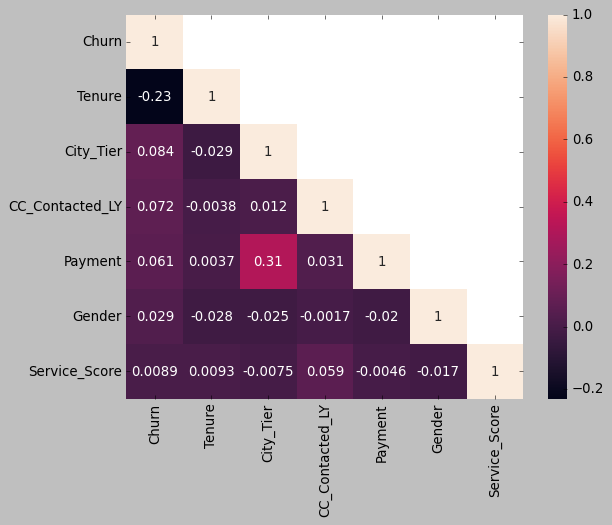

In [176]:
sns.heatmap(churn[['Churn','Tenure','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score']].corr(),
            annot=True,mask=np.triu(churn[['Churn','Tenure','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score']].corr(),+1));

<Axes: >

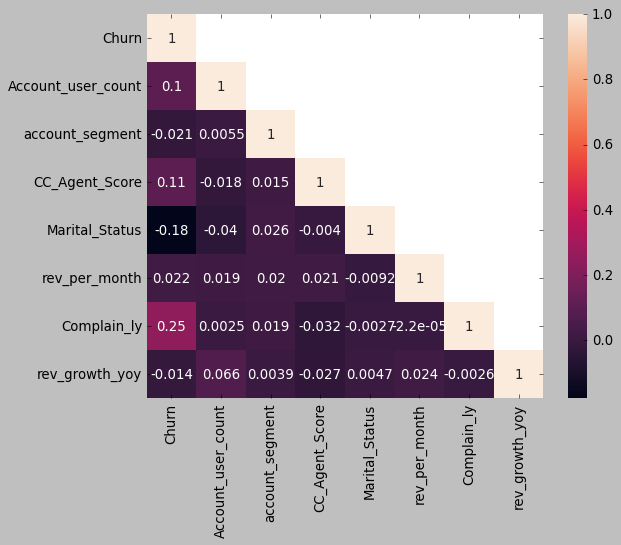

In [178]:
sns.heatmap(churn[['Churn','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy']].corr(),
            annot=True,mask=np.triu(churn[['Churn','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy']].corr(),+1))

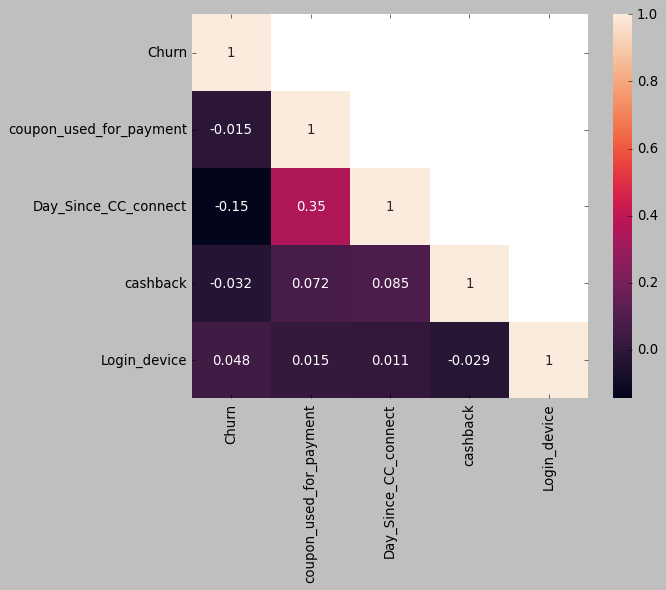

In [179]:
sns.heatmap(churn[['Churn','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']].corr(),
            annot=True,mask=np.triu(churn[['Churn','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']].corr(),+1));

### scaling data and outlier treatment

In [180]:
churn['Payment'] = churn['Payment'].astype('int64')
churn['Gender'] = churn['Gender'].astype('int64')
churn['Service_Score'] = churn['Service_Score'].astype('int64')
churn['Account_user_count'] = churn['Account_user_count'].astype('int64')
churn['account_segment'] = churn['account_segment'].astype('int64')
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].astype('int64')
churn['rev_per_month'] = churn['rev_per_month'].astype('int64')
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].astype('int64')
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].astype('int64')
churn['cashback'] = churn['cashback'].astype('int64')
churn['Marital_Status'] = churn['Marital_Status'].astype('int64')
churn['Complain_ly'] = churn['Complain_ly'].astype('int64')
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].astype('int64')
churn['Login_device'] = churn['Login_device'].astype('int64')

In [181]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   AccountID                11260 non-null  int64
 1   Churn                    11260 non-null  int64
 2   Tenure                   11260 non-null  Int64
 3   City_Tier                11260 non-null  Int64
 4   CC_Contacted_LY          11260 non-null  Int64
 5   Payment                  11260 non-null  int64
 6   Gender                   11260 non-null  int64
 7   Service_Score            11260 non-null  int64
 8   Account_user_count       11260 non-null  int64
 9   account_segment          11260 non-null  int64
 10  CC_Agent_Score           11260 non-null  int64
 11  Marital_Status           11260 non-null  int64
 12  rev_per_month            11260 non-null  int64
 13  Complain_ly              11260 non-null  int64
 14  rev_growth_yoy           11260 non-null  int64
 15  co

### Visualization before outlier treatment

<Axes: xlabel='Tenure'>

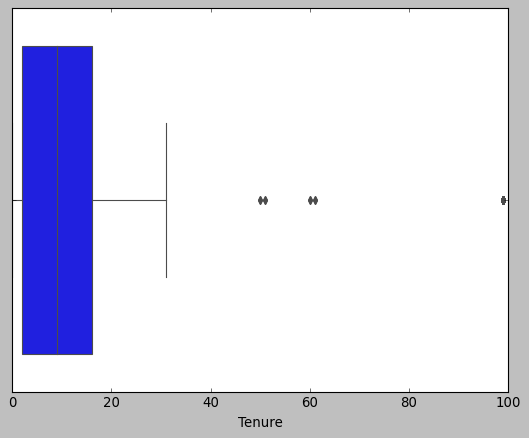

In [182]:
sns.boxplot(x="Tenure", data = churn)

<Axes: xlabel='CC_Contacted_LY'>

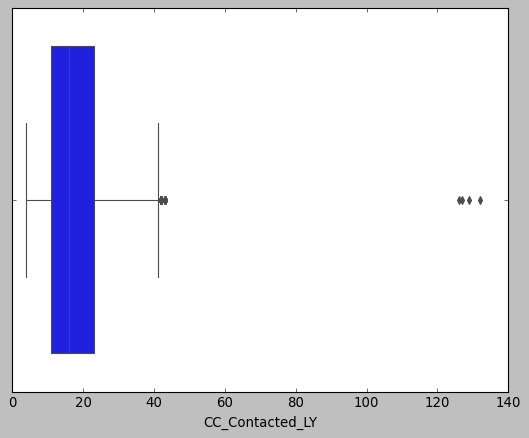

In [183]:
sns.boxplot(x="CC_Contacted_LY", data = churn)

<Axes: xlabel='Account_user_count'>

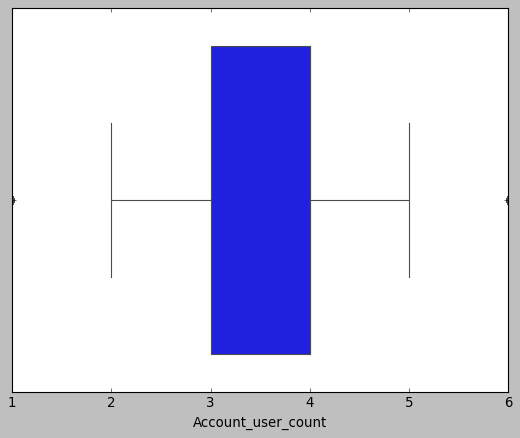

In [184]:
sns.boxplot(x="Account_user_count", data = churn)

<Axes: xlabel='rev_per_month'>

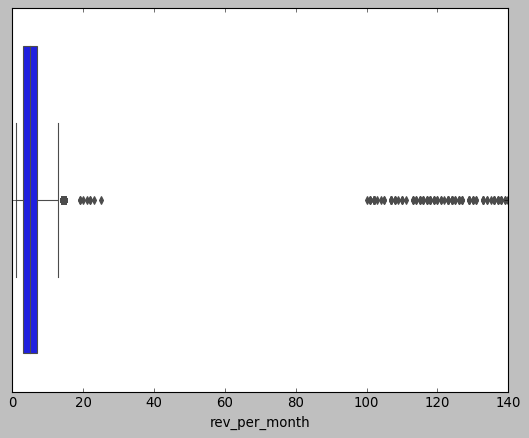

In [185]:
sns.boxplot(x="rev_per_month", data = churn)

<Axes: xlabel='rev_growth_yoy'>

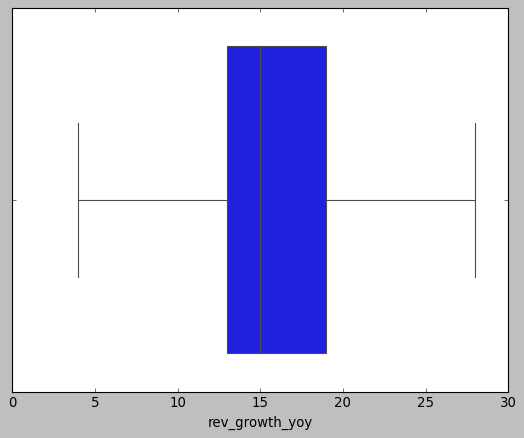

In [186]:
sns.boxplot(x="rev_growth_yoy", data = churn)

<Axes: xlabel='coupon_used_for_payment'>

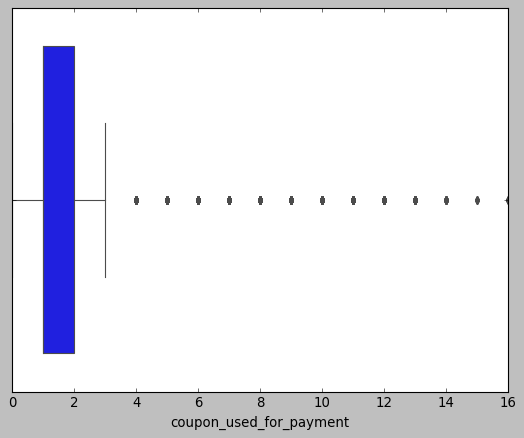

In [187]:
sns.boxplot(x="coupon_used_for_payment", data = churn)

<Axes: xlabel='Day_Since_CC_connect'>

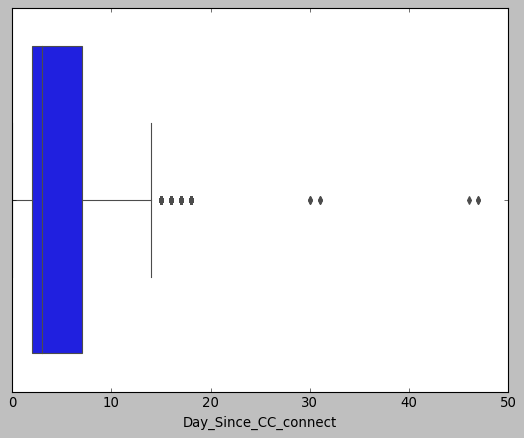

In [188]:
sns.boxplot(x="Day_Since_CC_connect", data = churn)

<Axes: xlabel='cashback'>

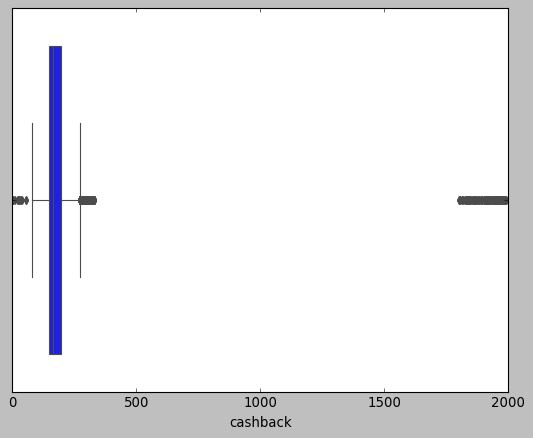

In [189]:
sns.boxplot(x="cashback", data = churn)

In [190]:
#treating outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [191]:
lw,up=remove_outlier(churn['Tenure'])
churn['Tenure']=np.where(churn['Tenure']>up,up,churn['Tenure'])
churn['Tenure']=np.where(churn['Tenure']<lw,lw,churn['Tenure'])

lw,up=remove_outlier(churn['CC_Contacted_LY'])
churn['CC_Contacted_LY']=np.where(churn['CC_Contacted_LY']>up,up,churn['CC_Contacted_LY'])
churn['CC_Contacted_LY']=np.where(churn['CC_Contacted_LY']<lw,lw,churn['CC_Contacted_LY'])

lw,up=remove_outlier(churn['Account_user_count'])
churn['Account_user_count']=np.where(churn['Account_user_count']>up,up,churn['Account_user_count'])
churn['Account_user_count']=np.where(churn['Account_user_count']<lw,lw,churn['Account_user_count'])

lw,up=remove_outlier(churn['cashback'])
churn['cashback']=np.where(churn['cashback']>up,up,churn['cashback'])
churn['cashback']=np.where(churn['cashback']<lw,lw,churn['cashback'])

lw,up=remove_outlier(churn['rev_per_month'])
churn['rev_per_month']=np.where(churn['rev_per_month']>up,up,churn['rev_per_month'])
churn['rev_per_month']=np.where(churn['rev_per_month']<lw,lw,churn['rev_per_month'])

lw,up=remove_outlier(churn['Day_Since_CC_connect'])
churn['Day_Since_CC_connect']=np.where(churn['Day_Since_CC_connect']>up,up,churn['Day_Since_CC_connect'])
churn['Day_Since_CC_connect']=np.where(churn['Day_Since_CC_connect']<lw,lw,churn['Day_Since_CC_connect'])

lw,up=remove_outlier(churn['coupon_used_for_payment'])
churn['coupon_used_for_payment']=np.where(churn['coupon_used_for_payment']>up,up,churn['coupon_used_for_payment'])
churn['coupon_used_for_payment']=np.where(churn['coupon_used_for_payment']<lw,lw,churn['coupon_used_for_payment'])

lw,up=remove_outlier(churn['rev_growth_yoy'])
churn['rev_growth_yoy']=np.where(churn['rev_growth_yoy']>up,up,churn['rev_growth_yoy'])
churn['rev_growth_yoy']=np.where(churn['rev_growth_yoy']<lw,lw,churn['rev_growth_yoy'])

### Visualization after treating outliers

<Axes: xlabel='Tenure'>

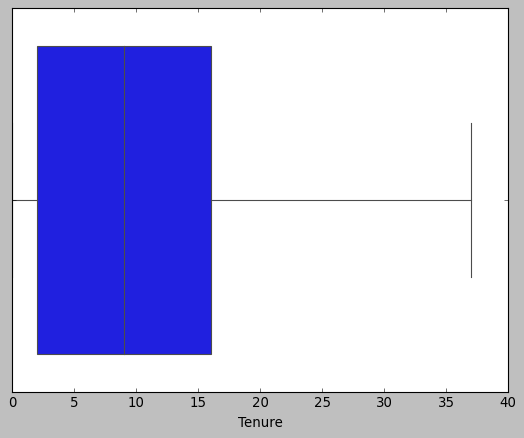

In [192]:
sns.boxplot(x="Tenure", data = churn)

<Axes: xlabel='CC_Contacted_LY'>

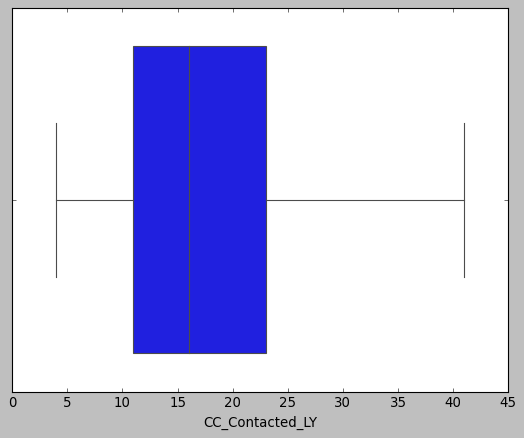

In [193]:
sns.boxplot(x="CC_Contacted_LY", data = churn)

<Axes: xlabel='Account_user_count'>

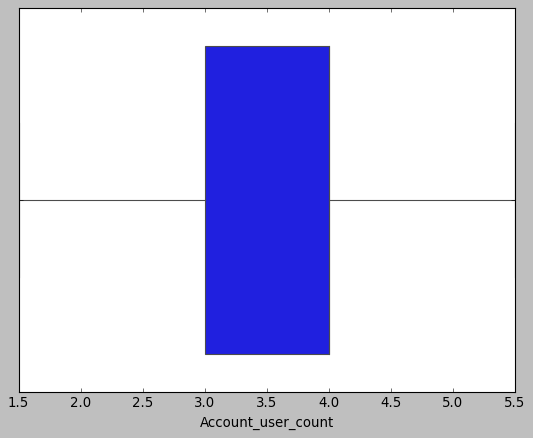

In [194]:
sns.boxplot(x="Account_user_count", data = churn)

<Axes: xlabel='rev_per_month'>

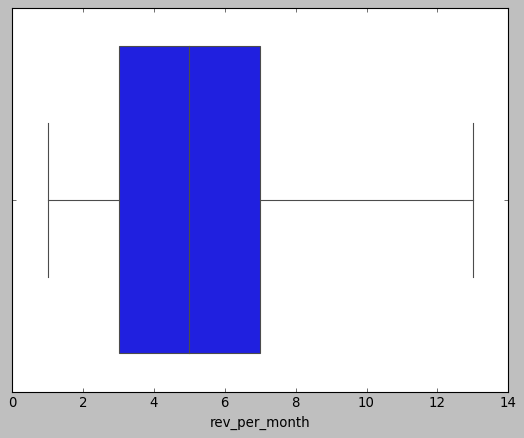

In [195]:
sns.boxplot(x="rev_per_month", data = churn)

<Axes: xlabel='rev_growth_yoy'>

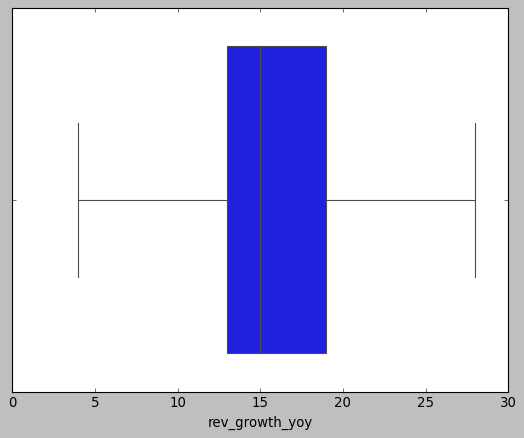

In [196]:
sns.boxplot(x="rev_growth_yoy", data = churn)

<Axes: xlabel='coupon_used_for_payment'>

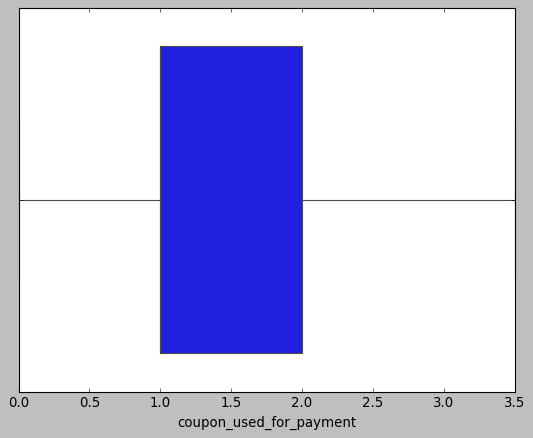

In [197]:
sns.boxplot(x="coupon_used_for_payment", data = churn)

<Axes: xlabel='Day_Since_CC_connect'>

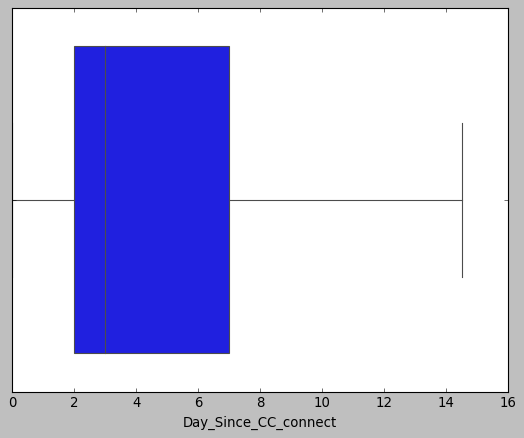

In [198]:
sns.boxplot(x="Day_Since_CC_connect", data = churn)

<Axes: xlabel='cashback'>

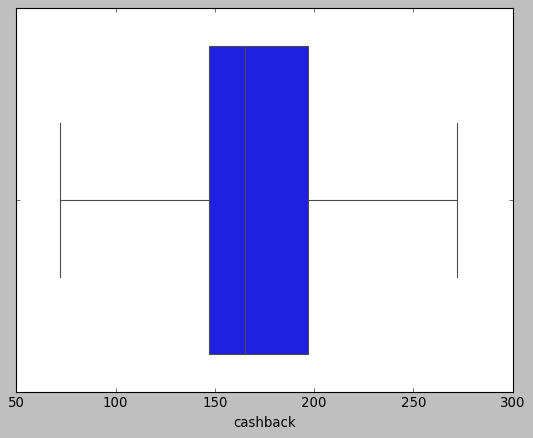

In [199]:
sns.boxplot(x="cashback", data = churn)

### Scaling data

In [200]:
from sklearn.preprocessing import MinMaxScaler

churn['Scaled_Churn'] = MinMaxScaler().fit_transform(churn[['Churn']])
churn['Scaled_Tenure'] = MinMaxScaler().fit_transform(churn[['Tenure']])
churn['Scaled_City_Tier'] = MinMaxScaler().fit_transform(churn[['City_Tier']])
churn['Scaled_CC_Contacted_LY'] = MinMaxScaler().fit_transform(churn[['CC_Contacted_LY']])
churn['Scaled_Payment'] = MinMaxScaler().fit_transform(churn[['Payment']])
churn['Scaled_Gender'] = MinMaxScaler().fit_transform(churn[['Gender']])
churn['Scaled_Service_Score'] = MinMaxScaler().fit_transform(churn[['Service_Score']])
churn['Scaled_Account_user_count'] = MinMaxScaler().fit_transform(churn[['Account_user_count']])
churn['Scaled_account_segment'] = MinMaxScaler().fit_transform(churn[['account_segment']])
churn['Scaled_CC_Agent_Score'] = MinMaxScaler().fit_transform(churn[['CC_Agent_Score']])
churn['Scaled_Marital_Status'] = MinMaxScaler().fit_transform(churn[['Marital_Status']])
churn['Scaled_rev_per_month'] = MinMaxScaler().fit_transform(churn[['rev_per_month']])
churn['Scaled_Complain_ly'] = MinMaxScaler().fit_transform(churn[['Complain_ly']])
churn['Scaled_rev_growth_yoy'] = MinMaxScaler().fit_transform(churn[['rev_growth_yoy']])
churn['Scaled_coupon_used_for_payment'] = MinMaxScaler().fit_transform(churn[['coupon_used_for_payment']])
churn['Scaled_Day_Since_CC_connect'] = MinMaxScaler().fit_transform(churn[['Day_Since_CC_connect']])
churn['Scaled_cashback'] = MinMaxScaler().fit_transform(churn[['cashback']])
churn['Scaled_Login_device'] = MinMaxScaler().fit_transform(churn[['Login_device']])

In [201]:
churn_scaled = pd.DataFrame({
'Churn': churn['Scaled_Churn'] ,    
'Tenure': churn['Scaled_Tenure'] ,    
'City_Tier': churn['Scaled_City_Tier'] ,    
'CC_Contacted_LY': churn['Scaled_CC_Contacted_LY'] ,    
'Payment': churn['Scaled_Payment'] ,    
'Gender': churn['Scaled_Gender'] ,    
'Service_Score': churn['Scaled_Service_Score'] ,    
'Account_user_count': churn['Scaled_Account_user_count'] ,    
'account_segment': churn['Scaled_account_segment'] ,    
'CC_Agent_Score': churn['Scaled_CC_Agent_Score'] ,    
'Marital_Status': churn['Scaled_Marital_Status'] ,    
'rev_per_month': churn['Scaled_rev_per_month'] ,    
'Complain_ly': churn['Scaled_Complain_ly'] ,    
'rev_growth_yoy': churn['Scaled_rev_growth_yoy'] ,    
'coupon_used_for_payment': churn['Scaled_coupon_used_for_payment'] ,    
'Day_Since_CC_connect': churn['Scaled_Day_Since_CC_connect'] ,
'cashback': churn['Scaled_cashback'] ,    
'Login_device': churn['Scaled_Login_device'] })
churn_scaled

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1.0,0.108108,1.0,0.054054,0.00,0.0,0.6,0.375,0.00,0.25,0.0,0.666667,1.0,0.291667,0.285714,0.344828,0.435,0.0
1,1.0,0.000000,0.0,0.108108,0.25,1.0,0.6,0.625,0.25,0.50,0.0,0.500000,1.0,0.458333,0.000000,0.000000,0.240,0.0
2,1.0,0.000000,0.0,0.702703,0.00,1.0,0.4,0.625,0.25,0.50,0.0,0.416667,1.0,0.416667,0.000000,0.206897,0.465,0.0
3,1.0,0.000000,1.0,0.297297,0.00,1.0,0.4,0.625,0.00,1.00,0.0,0.583333,0.0,0.791667,0.000000,0.206897,0.310,0.0
4,1.0,0.000000,0.0,0.216216,0.50,1.0,0.4,0.375,0.25,1.00,0.0,0.166667,0.0,0.291667,0.285714,0.206897,0.285,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0.0,0.270270,0.0,0.810811,0.50,1.0,0.6,0.125,0.00,0.00,1.0,0.666667,0.0,0.625000,0.285714,0.275862,0.405,1.0
11256,0.0,0.351351,0.0,0.405405,0.50,1.0,0.6,0.875,0.75,1.00,1.0,0.500000,0.0,0.500000,0.285714,0.551724,0.770,0.0
11257,0.0,0.027027,0.0,0.270270,0.00,1.0,0.6,0.125,0.00,0.75,1.0,0.500000,1.0,0.750000,0.285714,0.275862,0.595,0.0
11258,0.0,0.621622,1.0,0.189189,0.50,1.0,0.8,0.875,0.00,0.75,1.0,0.500000,0.0,0.500000,0.571429,0.620690,0.535,1.0


In [202]:
print(churn_scaled.std())

Churn                      0.374223
Tenure                     0.240241
City_Tier                  0.456381
CC_Contacted_LY            0.231463
Payment                    0.344845
Gender                     0.488878
Service_Score              0.144495
Account_user_count         0.231069
account_segment            0.316751
CC_Agent_Score             0.343166
Marital_Status             0.447373
rev_per_month              0.239968
Complain_ly                0.447181
rev_growth_yoy             0.156553
coupon_used_for_payment    0.314928
Day_Since_CC_connect       0.240931
cashback                   0.218847
Login_device               0.442952
dtype: float64


In [203]:
churn_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  float64
 5   Gender                   11260 non-null  float64
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  float64
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  float64
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [204]:
churn_scaled['Payment'] = churn_scaled['Payment'].astype('int64')
churn_scaled['Gender'] = churn_scaled['Gender'].astype('int64')
churn_scaled['Service_Score'] = churn_scaled['Service_Score'].astype('int64')
churn_scaled['Account_user_count'] = churn_scaled['Account_user_count'].astype('int64')
churn_scaled['account_segment'] = churn_scaled['account_segment'].astype('int64')
churn_scaled['CC_Agent_Score'] = churn_scaled['CC_Agent_Score'].astype('int64')
churn_scaled['rev_per_month'] = churn_scaled['rev_per_month'].astype('int64')
churn_scaled['coupon_used_for_payment'] = churn_scaled['coupon_used_for_payment'].astype('int64')
churn_scaled['Day_Since_CC_connect'] = churn_scaled['Day_Since_CC_connect'].astype('int64')
churn_scaled['cashback'] = churn_scaled['cashback'].astype('int64')
churn_scaled['Marital_Status'] = churn_scaled['Marital_Status'].astype('int64')
churn_scaled['Complain_ly'] = churn_scaled['Complain_ly'].astype('int64')
churn_scaled['rev_growth_yoy'] = churn_scaled['rev_growth_yoy'].astype('int64')
churn_scaled['Login_device'] = churn_scaled['Login_device'].astype('int64')
#churn_scaled['Churn'] = churn_scaled['Churn'].astype('int64')
churn_scaled['Tenure'] = churn_scaled['Tenure'].astype('int64')
churn_scaled['City_Tier'] = churn_scaled['City_Tier'].astype('int64')
churn_scaled['CC_Contacted_LY'] = churn_scaled['CC_Contacted_LY'].astype('int64')

In [205]:
churn_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  int64  
 2   City_Tier                11260 non-null  int64  
 3   CC_Contacted_LY          11260 non-null  int64  
 4   Payment                  11260 non-null  int64  
 5   Gender                   11260 non-null  int64  
 6   Service_Score            11260 non-null  int64  
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  int64  
 9   CC_Agent_Score           11260 non-null  int64  
 10  Marital_Status           11260 non-null  int64  
 11  rev_per_month            11260 non-null  int64  
 12  Complain_ly              11260 non-null  int64  
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

### Splitting data into train and test data set

In [206]:
# splitting data into independent and dependent variables
X = churn_scaled.drop('Churn' , axis=1)

y = churn_scaled.pop("Churn")

In [207]:
#splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [208]:
#checking the dimentsions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7882, 17)
X_test (3378, 17)
y_train (7882,)
y_test (3378,)


In [210]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\admin\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, mlxtend, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


In [211]:
!pip install scikit-learn

In [212]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [213]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.975], flip_y=0, random_state=1)
counter=Counter(y)
counter

Counter({0: 975, 1: 25})

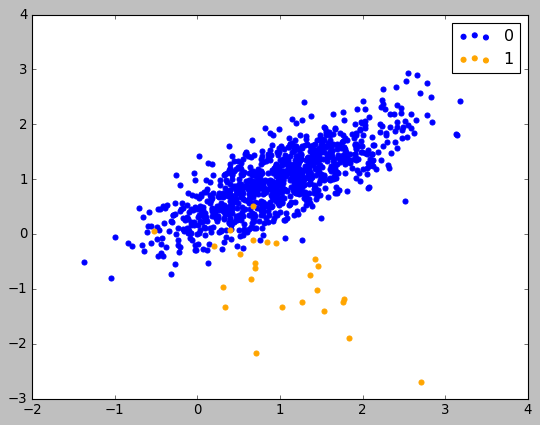

In [214]:
from collections import Counter
colors = ['blue', 'orange'] 
for i, (label, _) in enumerate(counter.items()):
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=colors[i % len(colors)])
plt.legend()
plt.show()

### Performing SMOTE to balance data

In [215]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [216]:
# applying smote to train dataset and resampling
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [217]:
#checking the dimentsions of training and test data
print('X_train_res',X_train_res.shape)
#print('X_test',X_test.shape)
print('y_train_res',y_train_res.shape)
#print('y_test',y_test.shape)

X_train_res (13112, 17)
y_train_res (13112,)


In [218]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [219]:
counter=Counter(y)
counter

Counter({0: 975, 1: 975})

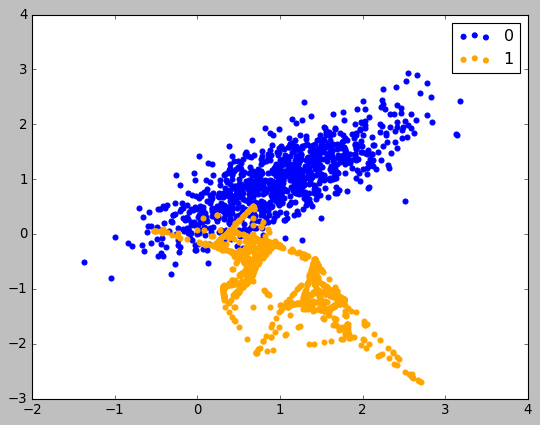

In [220]:
colors = ['blue', 'orange'] 
for i, (label, _) in enumerate(counter.items()):
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=colors[i % len(colors)])
plt.legend()
plt.show()

In [221]:
from sklearn.cluster import KMeans 

In [222]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(churn_scaled)
    wss.append(KM.inertia_)

In [223]:
wss

[18663.90825932483,
 15981.519809020308,
 15532.893382364466,
 13586.644692700762,
 12462.362408985096,
 12204.862663926971,
 11510.87559096401,
 11259.1093904224,
 10885.137085046179,
 10622.33213341137]

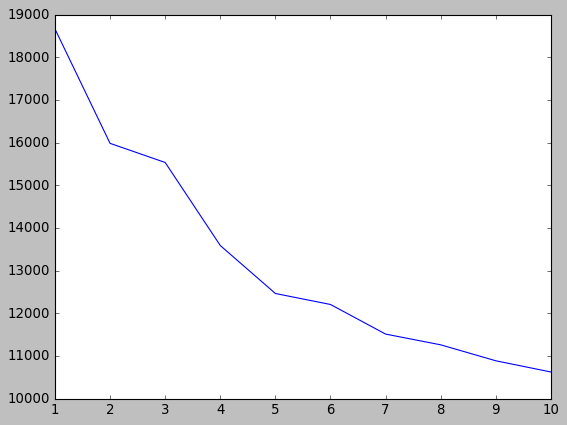

In [224]:
plt.plot(range(1,11), wss)

In [225]:
k_means = KMeans(n_clusters = 3)
k_means.fit(churn_scaled)
labels = k_means.labels_

In [226]:
churn_scaled["Clus_kmeans"] = labels
churn_scaled.head(5)

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Clus_kmeans
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [227]:
churn_scaled.groupby(["Clus_kmeans"]).count()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
Clus_kmeans,,,,,,,,,,,,,,,,,
0,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636,4636
1,2278,2278,2278,2278,2278,2278,2278,2278,2278,2278,2278,2278,2278,2278,2278,2278,2278
2,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346,4346
